# Analysis of the  ZooLake dataset versions
This notebook contains an explorative data analysis to compare the class distirbutions of the diffrent dataset versions of ZooLake. It's based on the original file `analyse_dataset.py` from the repo [plankifier](https://github.com/mbaityje/plankifier/tree/master) by M. Baitsy. 

## 1 Introduction
The ZooLake dataset is an open data project from Eawag that aims to automate the classification of 35 different lake plankton species using deep learning and other machine learning algorithms. The objective of the image classification is to enable the monitoring of the different plankton populations over time, as plankton are effective indicators of environmental change and ecosystem health in freshwater habitats.

The collection of images of plankton is an ongoing process, with the objective of improving the classification through the addition of more images. the most recent images that have not yet been manually labelled by a taxonomist can be viewed at the webpage [Aquascope](https://aquascope.ch/)  under the heading 'Latest Greifensee.' The new unlabelled images are being labelled manually by taxonomists over time. Once a sufficient number of images have been labelled or used for a scientific paper, a new labelled collection is published. These diffrent collections of labeld images represent the ZooLake versions. 

The data set also include files, to recreate the same test/validation/train to make the model training and testing of the models comparable and reproducible.

### 1.1 Public data set versions

As of the present date, 20 September 2024, they are a two version of the ZooLake data set aviable for the public on the eawag open research page eric. This inculde following Versions:

- [ZooLake](https://opendata.eawag.ch/dataset/deep-learning-classification-of-zooplankton-from-lakes),  is the initial version of the dataset referenced by the paper 'Deep Learning Classification of Lake Zooplankton' with a tota of 17900 labelled images.

- [Zoolake2.0](https://data.eawag.ch/dataset/data-for-producing-plankton-classifiers-that-are-robust-to-dataset-shift), second version of the data set, which include more labelled data and the introduction of the *out-of-dataset (OOD)*. The OOD was utilised by C. Cheng et al. (2024) in their research into producing plankton classifiers that are robust to dataset shift. It also mentioned there,  that the ZooLake2.0 images come with a 2-year gap of the fist ZooLake Version and a total of 24'000 images


-  [Zoolake3.0](https://opendata.eawag.ch/) incomming...
 

### 1.2 Objectives of the explorativ analysis

This explorativ data anlysis notebook aim to research following points:

- Are they any  duplicates images?
- How are the distirbutions of the diffrent planton classes compared over the differnt data sets
- Are the old version subsets of the new versions, as mentioned by Chen et la.
- Are they any data leakage betweens the old and new versions test/train splits


## 2 Data structure

As previously stated in the introduction, the data was obtained from the open-source webpage eric on the eawag website. In order to achieve the previously stated objectives of the analysis, it is necessary to take a closer look at the structure of the data structure.

### 2.1 Folder structure of each version

The data structure of the different versions is organised in the manner demonstrated below. The data set of the first version is displayed on the left, with that of the second version shown on the right.

```md

            ZooLake1 (data)                                 
        zooplankton_0p5x/                            
        ├── aphanizomenon/                        
        │   ├── training_data/                      
        │   │   ├── image1.jpeg                        
        │   │   └── ...                           
        │   └── features.tsv                               
        ├── class2/                               
        │   ├── training_data                        
        │   │   ├── image1.jpeg                                 
        │   │   └── ...                                                                        
        │   └── features.tsv                                           
        ├──  ...
        └──  zoolake_train_test_val_separated/ 
            ├── classes_ERIC.npy
            ├── Data.pickle
            ├── test_filenames.txt
            ├── train_filenames.txt
            └── val_filenames.txt        
        
            ZooLake2.0
        zooplankton2/
        ├── aphanizomenon/
        │   ├── image1.jpg
        │   └── ...│
        ├── class2/
        │   ├── image1.jpg
        │   ├── image2.jpg
        │   └── ...
        ├── ... 
        └── Files_used_for_training_testing.pickle 
``` 

In both data sets, the 35 folders representing a plankton species with classified images of the plankton represent the most significant information within the dataset. Version 1 of the data set differs from version 2 in thetween each plankton class folder and images there is a folder named `training_data` and the file `features.tsv`. It should be noted that the folder named as `training_data` does not contain details regarding the training data for the model, contrary to assumptions that might be made.  The .tsv files contain the data used for the classification model referenced in Deep Learning Classification of Lake Zooplankton by Kyathanahally, S. et al. It is anticipated that the folder structure will align with that of ZooLake Version 2 for subsequent versions.

### 2.2 Files for the resconstruction of the train/val/test split

The train/validation and test split utilised in the linked publication of the dataset can be replicated with the provided split information in the different versions. Both versions of ZooLake include a list of each image name and its corresponding split. However, there is a discrepancy in the manner of storage. 
 

- [ZooLake1]() The image file names that should be used to recreate the split are listed in the folder zoolake_train_test_val_separated in the form of different text files. The text files are labelled with the names of the splits.

- [ZooLake2]() The split is contained within in the only pickle file  `Files_used_for_training_testing.pickle` as a pd.DatFrame object. Based on the provided code by C.Chen in the function  [SplitFromPickle insidetrain_val_test_split.py  in the Plankiformer_OOD](https://github.com/cchen07/Plankiformer_OOD/blob/main/utils_analysis/train_val_test_split.py), it is assumed that the image names used for the training set are in the first column, for the validation set in the second, and for the test set in the third. 
### 2.3 Strurte of the image name

The file names of the individual images and folders contain comprehensive information regarding the specific class, the time at which the image was captured, and further details about the region of interest (RoI) that was identified.  The region of interest (RoI) contains the plankton organisms.   


\begin{array}{cccccccccccccccccc}
\text{SPC-EAWAG-0P5X-} & \text{1559498410-} & \text{191177-} & \text{6403834470-} & \text{952-} & \text{000009-} & \text{061-} & \text{1220-} & \text{2378-} & \text{52-} & \text{40} & \text{.jpeg} \\
\textit{1} &   \textit{2} &   \textit{3} &   \textit{4} &  \textit{5} &   \textit{6} &   \textit{7} &   \textit{8} &   \textit{9} &   \textit{10} &  \textit{11}
\end{array}

**Data Field Descriptions for SPC-EAWAG-0P5X Image**

| **Field** | **Description**                     |
|-----------|-------------------------------------|
| 1         | Camera name                         |
| 2         | Unixtime                            |
| 3         | Camera micros (microseconds)        |
| 4         | Frame number                        |
| 5         | RoI number (Region of Interest)     |
| 6         | RoI left position                   |
| 7         | RoI top position                    |
| 8         | RoI width                           |
| 9         | Roi height                          |
| 10        | Image width                         |
| 11        | Image height                        |


### 2.4 Local data strcutur

The local data folder structure for this repository is based on the cookie-cutter layout, as illustrated in the structure tree below. The folder designated for external data has been removed, as there is no external data utilised in this project. 


```md
    data
    ├── interim        <- Intermediate data with all images from the diffrent dataset versions.
    ├── processed      <- Data sets for the current modeling, splitted by train/test/validation/OOD.
    └── raw            <- original data, correspond the files downloaded from the eric portal.
```



## 3 Hashing of images 

The hashing of images is a widely used approach to handle a great amount of images since it reduces the image to a hash value that is a string. As the same image should always generate the same image hash using the same algorithm, the calculated hash value can be stored inside a SQL or No-Sql databse and one can check not only on the image 

Classic cryptographic hash algorithms compress the binary code of the image into an output hash with a fixed length, which can be used to straightforwardly test whether the two loaded images are identical down to each pixel value. Consequently, cryptographic algorithms such as SHA-256 for image hashing are limited in their ability to detect duplicates due to their sensitivity to even minor changes. For example, rotation, cropping, or even the alteration of a single pixel can result in the generation of an entirely different hash value. It is not possible to reproduce an image from its hash value; however, hashing an image with SHA-256 should always result in the same hash value.


### 3.1 Example of detection for similar images
To exemplify that an identical image produces an equivalent hash value utilising the SHA-256 algorithm and to ascertain whether the images across the various versions remain unaltered, the same image is retrieved from ZooLake1 and ZooLake2 and plotet alongside its calculated hash value in Fig. 1. 

In [67]:
# import lib and set working directory if needed
import os
import hashlib
from PIL import Image

import matplotlib.pyplot as plt

def check_current_work_dir():
    if not os.path.isfile("setup.py") or  os.path.basename(os.getcwd()).endswith('notebooks'):
        print("Changing the current directory to the parent directory containing the setup.py file")

        # move one folder up
        os.chdir("..")
        print(f"New current directory: {os.getcwd()}, it will remain this working directory for the rest of the notebook")

    if not os.path.isfile("setup.py"):
        raise Exception("setup.py not found in the current directory")
check_current_work_dir()


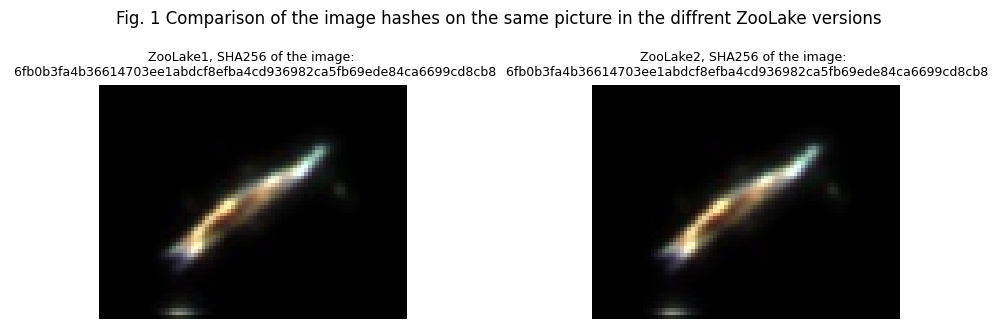

In [68]:
def hash_image(image_path: str) -> str:
    """open the image and hash it by using the SHA256 algorithm"""
    # Open the image file
    with Image.open(image_path) as img:

        # Read the binary data of the image! (without the metadata or file type)
        img_data = img.tobytes()

        # Calculate the SHA256 hash based on the binary data of the image
        return hashlib.sha256(img_data).hexdigest()
    
def plot_hash_with_image(image_paths: list[str]) -> plt:
    """Plot the images with their calulated hashes"""
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    for i, path in enumerate(image_paths):


        ax = axes[i]

        # open the image file
        with Image.open(path) as img:
            ax.imshow(img)
            ax.axis('off')
            ax.set_title(f"ZooLake{i+1}, SHA256 of the image: \n {hash_image(path)}", size = 9)

    plt.suptitle("Fig. 1 Comparison of the image hashes on the same picture in the diffrent ZooLake versions", size = 12)
   
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.6, 
                    hspace=0.4)
    return plt

# Define the path to the images
path_image1_v1 = os.path.join('data', 'raw', 'data', 'zooplankton_0p5x', 'aphanizomenon', 'training_data',
                              'SPC-EAWAG-0P5X-1570543372901157-3725350526242-001629-055-1224-2176-84-64.jpeg')
path_image1_v2 = os.path.join('data', 'raw', 'ZooLake2', 'ZooLake2.0', 'aphanizomenon', 
                              'SPC-EAWAG-0P5X-1570543372901157-3725350526242-001629-055-1224-2176-84-64.jpeg') 

plot_hash_with_image([path_image1_v1, path_image1_v2]).show()

Th comparison of the identical image with its corresponding image SH256-hash reveals that the specific image has not been modified in the alternative ZooLake versions, as the hash value is identical. 

### 3.2 Example on diffrent images

In order to demonstrate that even a single different pixel leads to the generation of a different hash value using the SH256-hash algorithm, the same image is loaded twice, with the first pixel value of the image modified from (0,0,0) to (0,0,1) for the calculation of the second hash value.


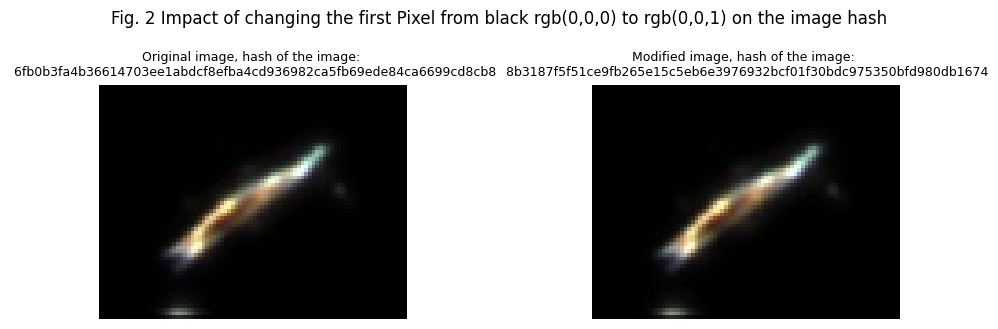

In [69]:
def change_first_pixel_color(image, new_color):
    """Change the color of the first pixel of the image"""
    img = image.convert('RGB')
    x = list(img.getdata())
    x[0] = new_color
    img.putdata(x)
    return img


def plot_hash_with_image_changed_pixel(image: str , new_color_rgb : tuple):
    """Plot the images with their calculated hashes after changing the first pixel color"""
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    # flattern array of axes into a 1D array
    axes = axes.flatten()  

    titles = ["Original image", "Modified image"]

    image_paths = [image] * 2

    for i, path in enumerate(image_paths):
        ax = axes[i]

        # open the image file
        with Image.open(path) as img:
            
            # check if second image to change the first pixel color
            if i == 1:
                img = change_first_pixel_color(img, new_color_rgb)

            # calculate the hash of the image
            img_bytes = img.tobytes()
            hash_value  = hashlib.sha256(img_bytes).hexdigest()
            ax.imshow(img)
            ax.axis("off")
            ax.set_title(f"{titles[i]}, hash of the image: \n {hash_value}", size = 9)

    plt.suptitle("Fig. 2 Impact of changing the first Pixel from black rgb(0,0,0) to rgb(0,0,1) on the image hash", size = 12)
    plt.tight_layout()
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.6, 
                    hspace=0.4)
    
    plt.show()
    
plot_hash_with_image_changed_pixel(path_image1_v2, new_color_rgb=(0, 0, 1))

        

As show in the Fig. 2 even a small change that can almost not detected by human eyes leads to a complet diffrent image hash using the SHA-256 algorithm. The properties to detect even small changes and simplify the handling of each images makes the SHA256 hash algorithm useful for creating a overview data set that is not only based on the filename. 


## 4 Creating an overview dataset based on the images

To simplify further analysis based on the metadata from the image, the `CreateOverviewDF` class has been developed to create an overview dataset based on the provided ZooLake folders. It contains several methods to handle the images across the different ZooLake versions. This section of the notebook shows the main functions and how to use them.


### 4.1  Installation of package and import of `CreateOverviewDF` 

To import the `CreateOverviewDF` class from the `data.create_overview_data_set` module, the entire lit_ecoclassifier code must be installed as a package in the current environment. The code cell belove checks if the current working path of the notebook is in the right paht. Else it moves one folder up and install the package. After a successful installation of the package, the class can be imported using the normal Python package and module handling. Note that after making custom changes to the code inside the package, it is necessary to reinstall the package since it was not installed in a editable modus. The working path is also changed for the rest of the notebook! 

In [70]:
# check if the setup.py file is in the current directory for a successful installation of the package
check_current_work_dir()


# installation of the package 
# "%"  makes the installation from a notebook cell out possible
# and "." since the setup.py is in the current directory
%pip install .

# import the CreateOverviewDf class from the lit_ecology_classifier package
from lit_ecology_classifier.data.create_overview_data_set import CreateOverviewDf

Processing c:\repos\plankton_classifier
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for lit_ecology_classifier: filename=lit_ecology_classifier-2.0-py3-none-any.whl size=40156 sha256=279f9a59dab338948fdd645074bf7e067f524e424ab27a283e0eb7f54603dab7
  Stored in directory: C:\Users\ruizjuan\AppData\Local\Temp\pip-ephem-wheel-cache-r9lfh1gh\wheels\ef\4e\b8\2be6c16208ad63911f0ceed2b4bee5a863a52ea77b22187903
Successfully built lit_ecology_classifier
  Attempting uninstall: lit_ecology_classifier
    Found existing installation: lit_ecology_classifier 2.0
    Uninstalling lit_ecology_classifier-2.0:
      Successfully uninstalled lit_ecology_classifier-2.0
Note: you may need to restart the kernel


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### 4.2 Initalisation of the class

At the initallisation of the class `CreateOverviewDF` it is nessecearly to define the  the dictionary `zoolake_version_paths`. The should contain the Version of Zoolakeas key as string and the path to the folder as value. The paths are needed for the search of images files inside eah version.

In [71]:
# define the paths to the data folders of the actual ZooLake versions
zoolake_version_paths = {
                "1": os.path.join("data", "raw", "data" ),
                "2": os.path.join("data", "raw", "ZooLake2"),
                "OOD": os.path.join("data", "raw", "OODs"),
            }

overview_creator = CreateOverviewDf(zoolake_version_paths)

### 4.3 Main functionalities

The main functionality of `CreateOverviewDF` is as mentioned to generate a overview of all images inside the defined zoolake_version_paths. It process each image individual to extraxt the needed metadata and calulate the hash. The User can decied if he wants a raw unaggregated overview, a grouped overview or even a overview with columns providing informationen about the train/val/test split.

#### 4.3.1 Process of the image and the meta data

A principal function of the `CreateOverviewDF` class is the generation of the image hash and the extraction of relevant metadata like plankton class from the image path, the version of the dataset from the zoolake_versions_paths , and the timestamp from the filename. In order to facilitate the simplification of the code and the implementation of unit testing procedures, each piece of metadata is extracted and calculated in a own privat method. Each method can be found inside the 
create_overview_data_set.py file. The prefix of the classes start either with `_extract` or `_hash`. Example of the image processing: 


In [72]:
# image_path:   path to the image to be processed
# version:      version of the ZooLake data set. inside of the class it it correspond 
#                   the zoolake_path dictionary key value.

overview_creator.process_image("1",path_image1_v1)


{'image': 'SPC-EAWAG-0P5X-1570543372901157-3725350526242-001629-055-1224-2176-84-64.jpeg',
 'sha256': '6fb0b3fa4b36614703ee1abdcf8efba4cd936982ca5fb69ede84ca6699cd8cb8',
 'class': 'aphanizomenon',
 'data_set_version': '1',
 'date': datetime.datetime(2019, 10, 8, 14, 2, 52, tzinfo=datetime.timezone.utc)}

#### 4.3.2 Unaggragetet raw image overview

The image processing is applied to each image file found in the paths of the provided zoolake_version_paths and merged row by row to create an unaggregated overview dataframe of all images found. Since each image is processed individually, the first creation of the overview takes a short time approximately between 15s and 24s.

In [73]:
overview_creator.get_raw_df().head()

,image,sha256,class,data_set_version,date
0,SPC-EAWAG-0P5X-1570543372901157-3725350526242-...,6fb0b3fa4b36614703ee1abdcf8efba4cd936982ca5fb6...,aphanizomenon,1,2019-10-08 14:02:52+00:00
1,SPC-EAWAG-0P5X-1570543374882008-3725352526408-...,09e4aa12fdc992bbd840b7913f6f35394637bc2135c49f...,aphanizomenon,1,2019-10-08 14:02:54+00:00
2,SPC-EAWAG-0P5X-1589472012505862-10217420880920...,1ace5cdd5a68e8cd5fa703c92ac7c6e6b1d362b517132f...,aphanizomenon,1,2020-05-14 16:00:12+00:00
3,SPC-EAWAG-0P5X-1589472120505648-10217528889899...,f9a38d8538b1ac64383199851c61ad2f7f784e430086ea...,aphanizomenon,1,2020-05-14 16:02:00+00:00
4,SPC-EAWAG-0P5X-1589472215513831-10217623897796...,9cfb8f3f9d36cb50c32bedc72724092a7a01576ccb8529...,aphanizomenon,1,2020-05-14 16:03:35+00:00


#### 4.3.2 Summarized overview data frame

Since the images of old ZooLake versions are reused inside the newer data set versions, a lot of images would be double inside of the the overview data frame when multiple versions are loaded. To provide a tidier dataframe, the overview dataframe can be grouped by the hash, image name and class. The versions are than hotencoded for each image.

In [74]:
overview_creator.get_overview_df().head()

c:\Repos\plankton_classifier\lit_ecology_classifier\data\create_overview_data_set.py:376: UserWarning: Duplicates found in the dataset: 6
  warnings.warn(f"Duplicates found in the dataset: {duplicates.shape[0]}")


,image,class,sha256,date,ZooLake_1,ZooLake_2,ZooLake_OOD
0,SPC-EAWAG-0P5X-1570543372901157-3725350526242-...,aphanizomenon,6fb0b3fa4b36614703ee1abdcf8efba4cd936982ca5fb6...,2019-10-08 14:02:52+00:00,True,True,False
1,SPC-EAWAG-0P5X-1570543374882008-3725352526408-...,aphanizomenon,09e4aa12fdc992bbd840b7913f6f35394637bc2135c49f...,2019-10-08 14:02:54+00:00,True,True,False
2,SPC-EAWAG-0P5X-1589472012505862-10217420880920...,aphanizomenon,1ace5cdd5a68e8cd5fa703c92ac7c6e6b1d362b517132f...,2020-05-14 16:00:12+00:00,True,True,False
3,SPC-EAWAG-0P5X-1589472120505648-10217528889899...,aphanizomenon,f9a38d8538b1ac64383199851c61ad2f7f784e430086ea...,2020-05-14 16:02:00+00:00,True,True,False
4,SPC-EAWAG-0P5X-1589472215513831-10217623897796...,aphanizomenon,9cfb8f3f9d36cb50c32bedc72724092a7a01576ccb8529...,2020-05-14 16:03:35+00:00,True,True,False


As demonstrated in the table output above, a tidier data frame is created. The output also generated a warnings indicating the existence of duplicates. This occurs because a duplicate check is made previously to the grouping process. The duplicates are stored in a separate data frame and can be accessed via the get_duplicates_df method.

In [75]:
overview_creator.get_duplicates_df()

,sha256,data_set_version,count,diffrent_class,diffrent_image_name,image,class
0,4a10c4d703cd5093cec3d53bfe0b60efdc020ba93f0db8...,1,2,True,False,SPC-EAWAG-0P5X-1589537326874154-10282734293288...,polyarthra
1,4a10c4d703cd5093cec3d53bfe0b60efdc020ba93f0db8...,1,2,True,False,SPC-EAWAG-0P5X-1589537326874154-10282734293288...,rotifers
2,564301dc289d247001bd1094724383f14f99375b0aa2bb...,1,2,True,False,SPC-EAWAG-0P5X-1559498570246055-6403994484253-...,asterionella
3,564301dc289d247001bd1094724383f14f99375b0aa2bb...,1,2,True,False,SPC-EAWAG-0P5X-1559498570246055-6403994484253-...,dinobryon
4,c21c523d019f4ffc6dd1757e401cbaf44d42d3dd41a8a3...,1,2,True,False,SPC-EAWAG-0P5X-1528850008503168-564006655548-0...,asplanchna
5,c21c523d019f4ffc6dd1757e401cbaf44d42d3dd41a8a3...,1,2,True,False,SPC-EAWAG-0P5X-1528850008503168-564006655548-0...,dinobryon


#### 4.3.3 Test Train overview

The main function of the `main` or `get_overview_with_splits_df` data frame creates a data frame containing information about the affiliation of the test/train/validation split.

In [76]:
overview_df = overview_creator.get_overview_with_splits_df()
overview_df.head()

c:\Repos\plankton_classifier\lit_ecology_classifier\data\create_overview_data_set.py:544: UserWarning: New version, assuming a pickle file for split in the folder
  warnings.warn(
c:\Repos\plankton_classifier\lit_ecology_classifier\data\create_overview_data_set.py:491: UserWarning: No pickle file for OODfound in data\raw\OODs
  warnings.warn(f"No pickle file for {version}found in {datapath}")


,image,class,sha256,date,ZooLake_1,ZooLake_2,ZooLake_OOD,train_v1,test_v1,val_v1,train_v2,test_v2,val_v2
0,SPC-EAWAG-0P5X-1570543372901157-3725350526242-...,aphanizomenon,6fb0b3fa4b36614703ee1abdcf8efba4cd936982ca5fb6...,2019-10-08 14:02:52+00:00,True,True,False,True,False,False,True,False,False
1,SPC-EAWAG-0P5X-1570543374882008-3725352526408-...,aphanizomenon,09e4aa12fdc992bbd840b7913f6f35394637bc2135c49f...,2019-10-08 14:02:54+00:00,True,True,False,True,False,False,False,True,False
2,SPC-EAWAG-0P5X-1589472012505862-10217420880920...,aphanizomenon,1ace5cdd5a68e8cd5fa703c92ac7c6e6b1d362b517132f...,2020-05-14 16:00:12+00:00,True,True,False,True,False,False,True,False,False
3,SPC-EAWAG-0P5X-1589472120505648-10217528889899...,aphanizomenon,f9a38d8538b1ac64383199851c61ad2f7f784e430086ea...,2020-05-14 16:02:00+00:00,True,True,False,True,False,False,True,False,False
4,SPC-EAWAG-0P5X-1589472215513831-10217623897796...,aphanizomenon,9cfb8f3f9d36cb50c32bedc72724092a7a01576ccb8529...,2020-05-14 16:03:35+00:00,True,True,False,False,False,True,True,False,False


## 5 Duplicates 

The `get_duplicates_df` demo at 4.3.2 showed there are 6 duplicates in the data frame. They are plotted below for closer analysis.

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

In [78]:
duplicate_df = overview_creator.get_duplicates_df()
duplicate_df.head()

,sha256,data_set_version,count,diffrent_class,diffrent_image_name,image,class
0,4a10c4d703cd5093cec3d53bfe0b60efdc020ba93f0db8...,1,2,True,False,SPC-EAWAG-0P5X-1589537326874154-10282734293288...,polyarthra
1,4a10c4d703cd5093cec3d53bfe0b60efdc020ba93f0db8...,1,2,True,False,SPC-EAWAG-0P5X-1589537326874154-10282734293288...,rotifers
2,564301dc289d247001bd1094724383f14f99375b0aa2bb...,1,2,True,False,SPC-EAWAG-0P5X-1559498570246055-6403994484253-...,asterionella
3,564301dc289d247001bd1094724383f14f99375b0aa2bb...,1,2,True,False,SPC-EAWAG-0P5X-1559498570246055-6403994484253-...,dinobryon
4,c21c523d019f4ffc6dd1757e401cbaf44d42d3dd41a8a3...,1,2,True,False,SPC-EAWAG-0P5X-1528850008503168-564006655548-0...,asplanchna


<module 'matplotlib.pyplot' from 'c:\\Repos\\plankton_classifier\\.venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>

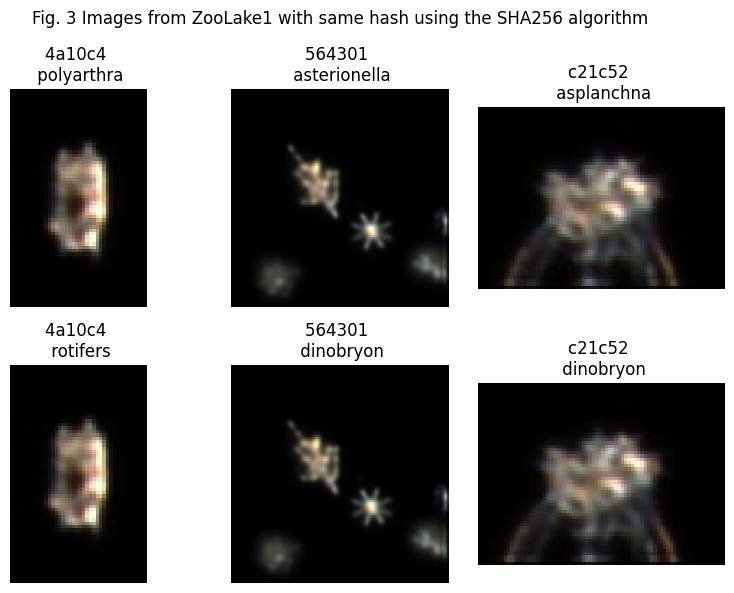

In [79]:

def plot_duplicates(duplicate_df,  
                    version_path_dic,
                    dataset_version):
   
    # get unique hash values
    unique_hashes = duplicate_df['sha256'].unique()

    # check if no duplicates to create empty plot
    if len(unique_hashes) == 0:
       
        text_plot = f'No images with the same hash value inside Zoolake{dataset_version} using the sha256 algorithm '
        plt.text(0.5, 0.5, s = text_plot, horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
        plt.axis('off')
        plt.tight_layout()
        return plt

    # limit the number of images to be plotted to the 5 hash values with the most images
    unique_hashes = duplicate_df.groupby('sha256').size().head().index

    # get the maximum number of images with the same hash value
    max_images = duplicate_df[duplicate_df['sha256'].isin(unique_hashes)].groupby('sha256').size().max()


    # start with generation of plots with
    fig, axs = plt.subplots( max_images, len(unique_hashes),figsize=(8, 6))
    for j, hash_value in enumerate(unique_hashes):

        # get images with the same hash value
        images_df = duplicate_df[duplicate_df['sha256'] == hash_value]
        
        # order by hash 
        images_df = images_df.sort_values(by='sha256')

        # iterate over each row of the df
        for i, row in enumerate(images_df.iterrows()):
            
            # extract each needed value fot the recreation of the path
            version= str(row[1]['data_set_version'])
            basepath = version_path_dic[version]    
            plankton_class = row[1]['class']
            image = row[1]['image']

            # handling of the path for version 1 and 2
            if version == "1":
                image_path = os.path.join(basepath, "zooplankton_0p5x", plankton_class, "training_data", image)
            else:
                image_path = os.path.join(basepath, plankton_class, image)

            img = mpimg.imread(image_path)
            axs[i, j].imshow(img)
            axs[i, j].axis('off')
            axs[i, j].set_title(f'{hash_value[:6]} \n {row[1]["class"]}')

        # remove empty subplots
        for k in range(i+1, max_images):
            fig.delaxes(axs[k, j])

    fig.suptitle(f'Fig. 3 Images from ZooLake{dataset_version} with same hash using the SHA256 algorithm',size = 12)
    plt.tight_layout()

    return plt

plot_duplicates(duplicate_df, zoolake_version_paths, "1")

##  6 Distirbutions of the classes




In [80]:
raw_overview_df = overview_creator.get_raw_df()

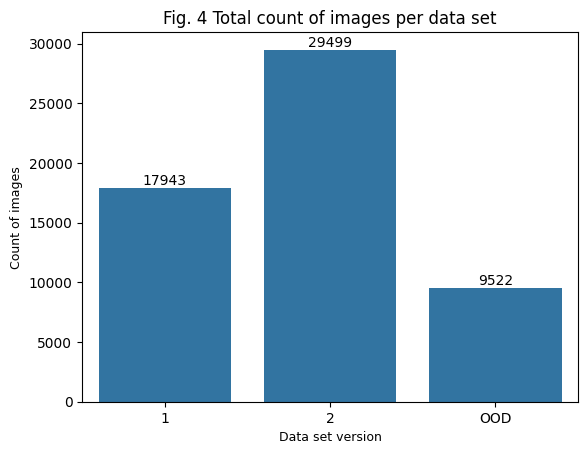

In [81]:
def plot_count_per_class(df):
    ax = sns.countplot(df,
                  x = 'data_set_version')
    ax.bar_label(ax.containers[0])

    plt.xlabel("Data set version", fontsize = 9)
    plt.ylabel("Count of images", fontsize = 9)

plot_count_per_class(raw_overview_df)
plt.title("Fig. 4 Total count of images per data set", size = 12)
plt.show()


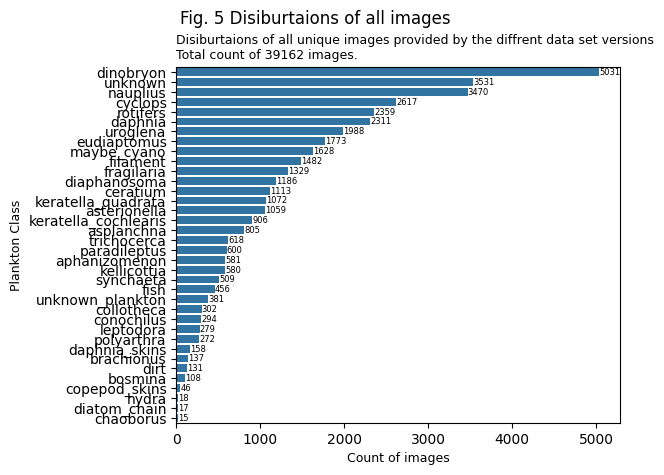

In [85]:
def y_axis_plot(df,hue):
        ax = sns.countplot(
        data=df,
        y='class',
        hue = hue,
        dodge = True
        )

        # add total ofbar
        ax.bar_label(ax.containers[0], fontsize = 6 )

        # x label 
        plt.xlabel("Count of images", fontsize = 9)

        # y label 
        plt.ylabel("Plankton Class", fontsize = 9)
        
        return ax
        
def x_axis_plot(df, hue):
        ax = sns.countplot(
        data=df,
        x ='class',
        hue = hue,
        dodge = True
        )

        # x label
        
        plt.xticks(rotation = 90)
        plt.xlabel("Plankton class", fontsize= 9)

        # y label
        plt.ylabel("Count of images", fontsize= 9)

        if hue != None:
            plt.legend(title = "Data set")

        return ax
        

def plot_distirbutions_of_plankton_classes(df, hue = None, y_bar = True):
    counts_class= df['class'].value_counts()
    order_by_count = list(counts_class.index)
    df['class'] = pd.Categorical(df['class'], order_by_count)
    if y_bar:
        y_axis_plot(df,hue)

    else:
        x_axis_plot(df,hue)
    plt.tight_layout()

    return plt

def plot_add_titels(plt,suptitle, title):
    plt.suptitle(suptitle, size = 12)
    plt.subplots_adjust(top=0.86)
    plt.title( title,
         size = 9,
          loc = "left" )
    return plt

plt.show()

title1 = "Fig. 5 Disiburtaions of all images"
title2 = f"Disiburtaions of all unique images provided by the diffrent data set versions\n\
Total count of {sum(overview_df['class'].value_counts())} images."

plt = plot_distirbutions_of_plankton_classes(overview_df)
plt = plot_add_titels(plt, title1, title2)



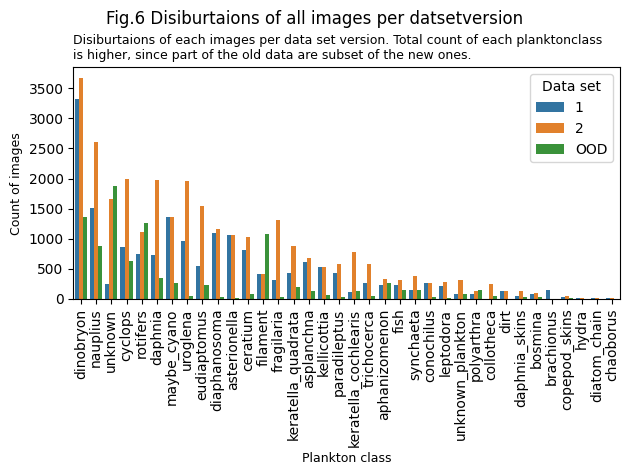

In [86]:

title1 = "Fig.6 Disiburtaions of all images per datsetversion"
title2 =    f"Disiburtaions of each images per data set version. Total count of each planktonclass\n\
is higher, since part of the old data are subset of the new ones."

sets_to_keep = ["1", "2", "OOD"]
filtered_raw_df = raw_overview_df.loc[raw_overview_df["data_set_version"].isin(sets_to_keep)]
plt = plot_distirbutions_of_plankton_classes(filtered_raw_df, hue = "data_set_version" , y_bar= False)
plt = plot_add_titels(plt, title1, title2)



# Dump
## Testing of the diffrent images 



## Test Train split

In [12]:
# Get the hashes for DataSetVersion 1 and 2
hashes_version_1 = set(image_hashes_df[image_hashes_df['DataSetVersion'] == '1']['image'])
hashes_version_2 = set(image_hashes_df[image_hashes_df['DataSetVersion'] == '2']['image'])

# Check if all hashes in version 2 are present in version 1
is_subset = hashes_version_2.issubset(hashes_version_1)

print(f"DataSetVersion 2 is a subset of DataSetVersion 1: {is_subset}")

DataSetVersion 2 is a subset of DataSetVersion 1: False


In [13]:
# Get the hashes for DataSetVersion 1 and 2
hashes_version_1 = set(image_hashes_df[image_hashes_df['DataSetVersion'] == '1']['hash_256'])
hashes_version_2 = set(image_hashes_df[image_hashes_df['DataSetVersion'] == '2']['hash_256'])

# Check if all hashes in version 2 are present in version 1
is_subset = hashes_version_2.issubset(hashes_version_1)

print(f"DataSetVersion 2 is a subset of DataSetVersion 1: {is_subset}")

DataSetVersion 2 is a subset of DataSetVersion 1: False


In [14]:
# dataset version 2 is a subset of dataset version 1 if the duplicate hashes from dataset version 1 are deleted
hashes_version_1_no_duplicates = set(image_hashes_df[image_hashes_df['DataSetVersion'] == '1'].drop_duplicates(subset='hash_256')['image'])

is_subset_no_duplicates = hashes_version_2.issubset(hashes_version_1_no_duplicates)

print(f"DataSetVersion 2 is a subset of DataSetVersion 1 without duplicates: {is_subset_no_duplicates}")

DataSetVersion 2 is a subset of DataSetVersion 1 without duplicates: False


In [15]:
# cehck which image are not in the subset

In [16]:
def split_from_duplicates(df):
    '''split the dataframe into two dataframes one with duplicates and one without duplicates'''

    # get all columns with hash in the name
    hash_columns = [col for col in df.columns if 'hash' in col]

    # get all duplicates
    duplicates = df[df.duplicated(subset=hash_columns, keep=False)]
    # get all unique images
    unique = df.drop_duplicates(subset=hash_columns, keep=False)

    return duplicates, unique